# Pymaceuticals Inc.
---

### Analysis

- This analysis aims to find out how different parameters, like dosage schedule, age, weight, and treatment duration, affect tumor growth in mice. The analysis's conclusions will help determine future research directions and advance knowledge of the efficacy of various treatment regimens.
- Overview of the Data: There are two primary parts of the dataset that was used for this analysis:
- Mouse Metadata: Contains details on each mouse participating in the study, such as treatment information, weight, age, and unique identifiers (Mouse ID).
- Study Findings: gives comprehensive tumor volume observations together with other study-related parameters for every mouse, such as medication schedule, time intervals, and tumor volume measures.
- The Mouse Metadata and Study Results CSV files were loaded into pandas DataFrames for processing and analysis.
- The Mouse Metadata and Study Results DataFrames were merged into a single DataFrame based on the common column "Mouse ID". This consolidated dataset facilitates comprehensive analysis by combining relevant information into one dataset.
- Duplicate rows in the combined DataFrame were identified and removed to prevent inaccuracies in analysis results.

## Exploratory Data Analysis (EDA):
Descriptive Statistics: Summary statistics such as mean, median, variance, and standard deviation of tumor volume were calculated for each treatment regimen to understand the distribution and variability of tumor volume data.
Various visualization techniques such as bar plots, box plots, scatter plots, and line plots were employed to explore relationships between variables, identify trends, and visualize distribution patterns.

## Key Findings
The investigation showed that different medication regimens had varying degrees of treatment efficacy. While certain regimens, including Capomulin and Ramicane, had less of an impact, others showed encouraging outcomes in terms of tumor volume reduction.
A possible association between the variables was suggested by the positive correlation that was seen between the tumor volume and mouse weight.
Effect of Treatment Duration: Tumor volume analysis across time suggested that treatment duration might have an impact on the dynamics of tumor growth, with longer treatment times being linked to larger tumor volume decreases.
The data provides insights on how well cancer treatment plans work to shrink tumour volumes in mice. This approach informs decision-making in preclinical cancer research and advances our understanding of treatment outcomes by examining the correlations between factors and highlighting important trends. In order to maximize results, more research might concentrate on identifying other variables affecting treatment success and improving treatment protocols.

 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice.
num_mice = combined_data.groupby("Mouse ID").ngroups
num_mice 

249

In [40]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_ID = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data.loc[combined_data["Mouse ID"].isin(duplicate_mice_ID["Mouse ID"])]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID"])
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [43]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned_data = len(cleaned_data["Mouse ID"].drop_duplicates())
num_mice_cleaned_data

249

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Rename columns 
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean':'Mean', 'median':'Median', 'var':'Variance', 'std':'Standard Deviation', 'sem':'SEM'})
summary_statistics 

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

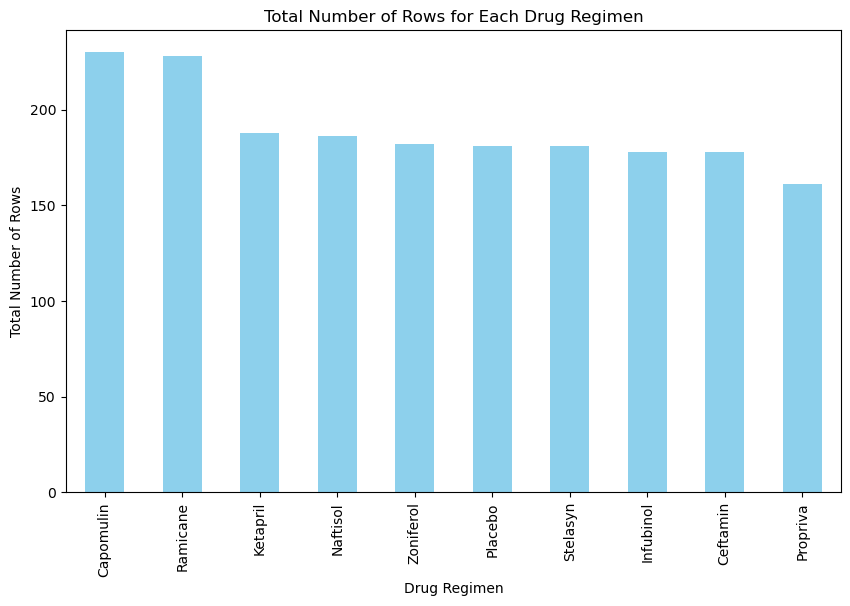

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


import pandas as pd

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = combined_data['Drug Regimen'].value_counts()

# Plot the bar plot using pandas
drug_regimen_counts.plot(kind='bar', color='skyblue', alpha=0.95, figsize=(10, 6))

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')

# Show the plot
plt.show()



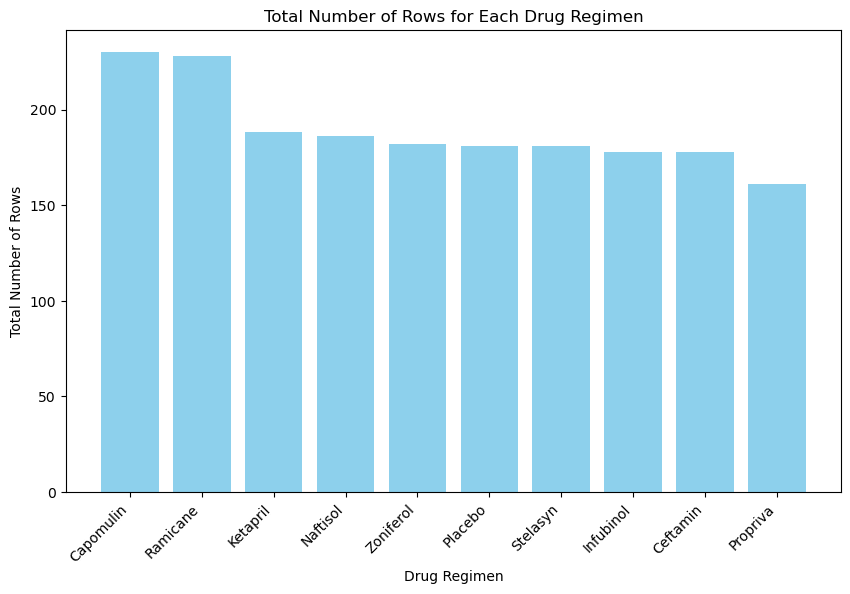

In [67]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.# 
import matplotlib.pyplot as plt

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = combined_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='skyblue', alpha=0.95)

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


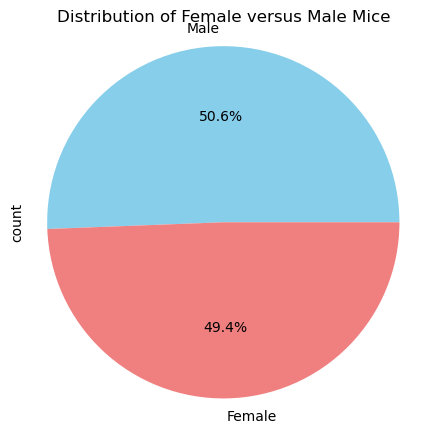

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the distribution of female versus male mice
gender_distribution = combined_data['Sex'].value_counts()

# Plot pie chart using Pandas
gender_distribution.plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Set the title
plt.title('Distribution of Female versus Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

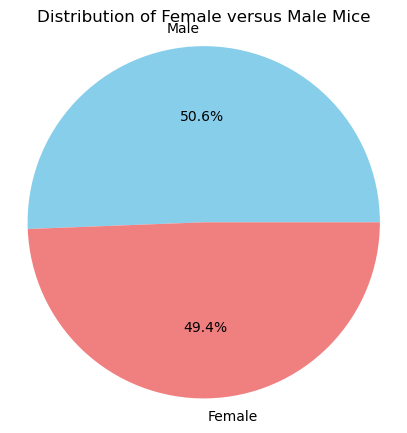

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate the distribution of female versus male mice
gender_distribution = combined_data['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(5, 5))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Set the title
plt.title('Distribution of Female versus Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_per_mouse = combined_data.groupby('Mouse ID')['Timepoint'].max()

final_tumor_volume = pd.merge(max_timepoint_per_mouse, combined_data, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
    
    
    # Calculate the IQR for each treatment regimen
for treatment in treatments:
    # Filter the final tumor volume data for the current treatment
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate quartiles (Q1, Q3) and IQR for the current treatment
    quartiles = treatment_data.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f"Treatment: {treatment}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    if len(outliers) == 0:
        print("No potential outliers")
    else:
        print(f"Potential outliers: {outliers}")
    print("\n")

    


Treatment: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
No potential outliers


Treatment: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
No potential outliers


Treatment: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


Treatment: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
No potential outliers




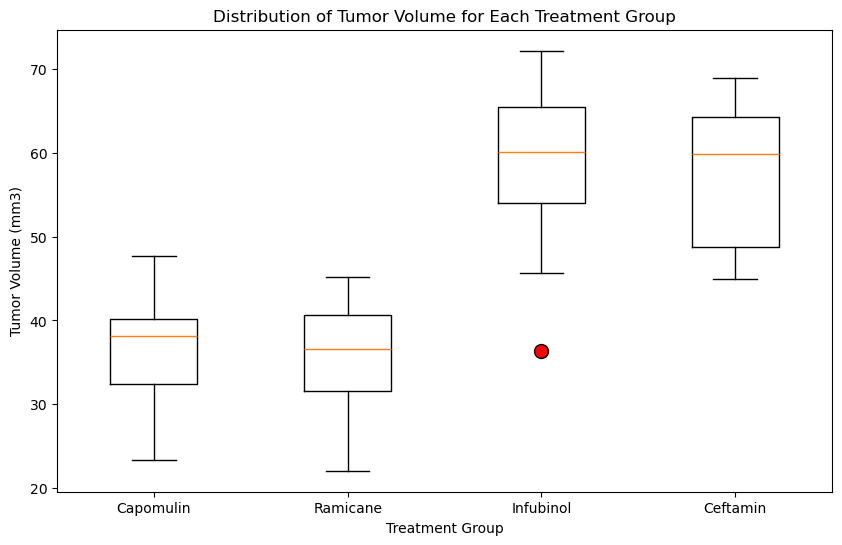

In [89]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

import matplotlib.pyplot as plt

# Create a list to store tumor volume data for each treatment group
tumor_volume_data = [final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'] for treatment in treatments]


# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))


# Set the title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

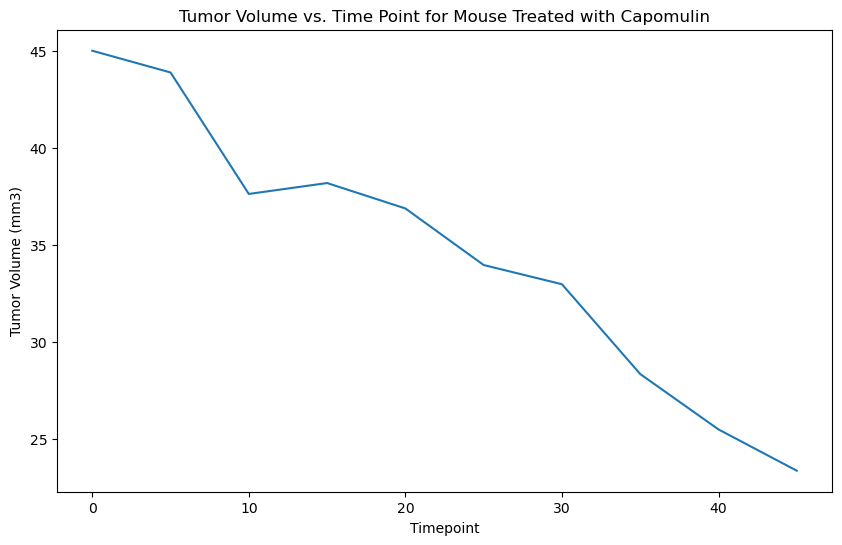

In [91]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for a single mouse treated with Capomulin
mouse_id = 's185'  # Example mouse ID
capomulin_data = combined_data[(combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == mouse_id)]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], linestyle='-')

# Set the title and labels
plt.title('Tumor Volume vs. Time Point for Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()





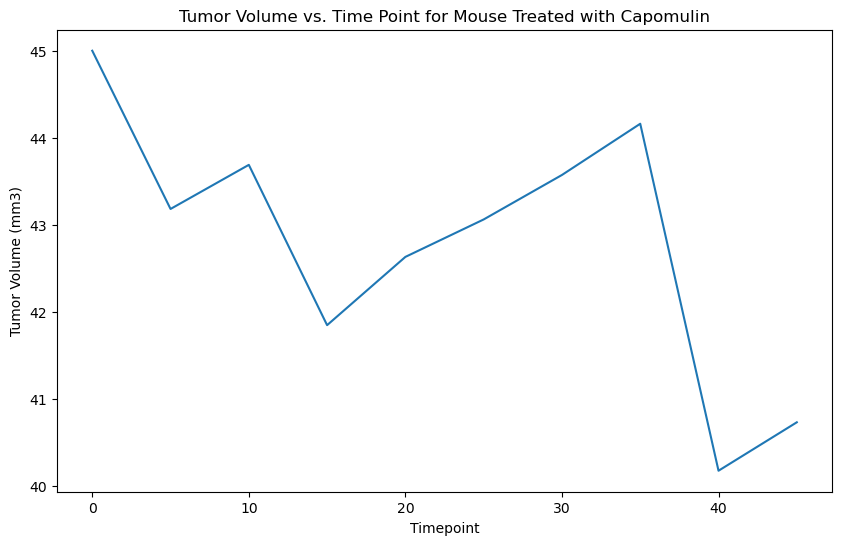

In [95]:
# Filter the data for a single mouse treated with Capomulin
mouse_id = 's710'  # Example mouse ID
capomulin_data = combined_data[(combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == mouse_id)]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], linestyle='-')

# Set the title and labels
plt.title('Tumor Volume vs. Time Point for Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


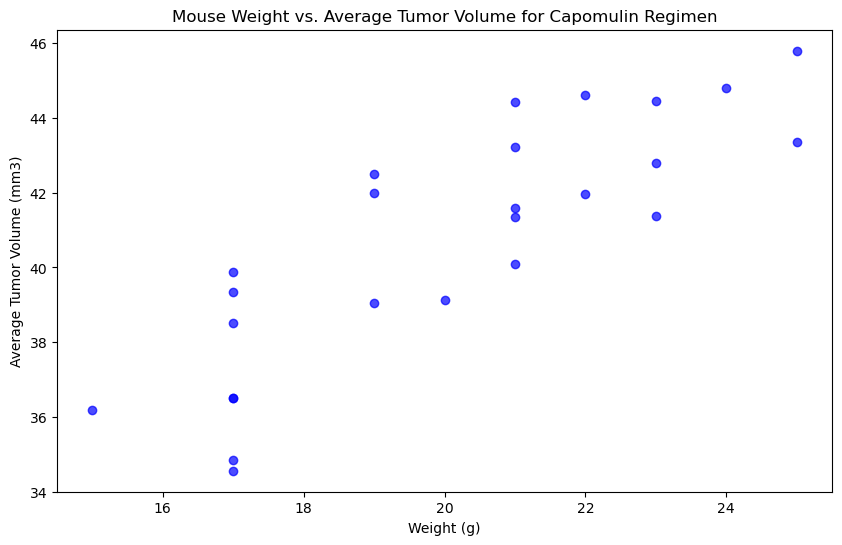

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='inner')

# Plot the scatter plot of mouse weight vs. the average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

In [97]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Import necessary library
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Print the slope and intercept of the regression line
print(f"Slope of the regression line: {slope}")
print(f"Intercept of the regression line: {intercept}")


Correlation Coefficient: 0.8419363424694721
Slope of the regression line: 0.9544396890241049
Intercept of the regression line: 21.552160532685008


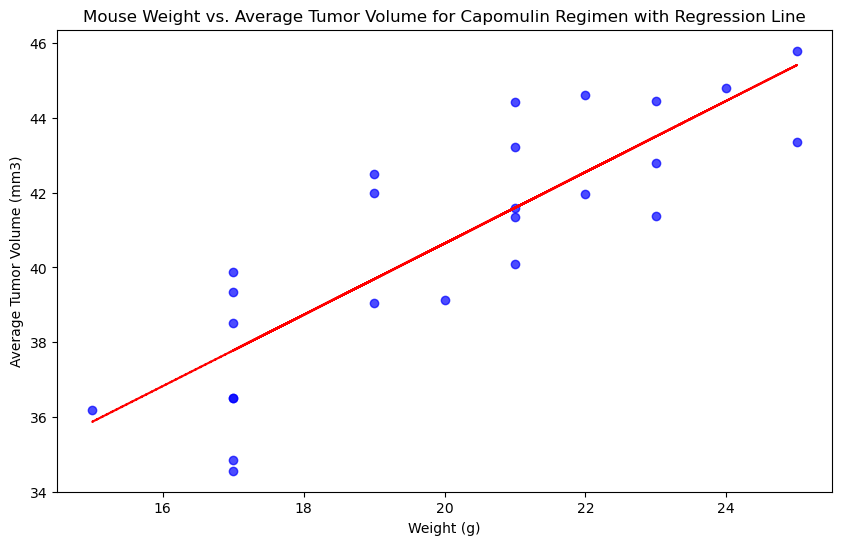

In [99]:
# Plot the scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Plot the regression line
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red', linestyle='--')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen with Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()
